In [1]:
rm(list=ls())
gc()

,used,(Mb),gc trigger,(Mb),max used,(Mb)
Ncells,534270,28.6,1205595,64.4,641780,34.3
Vcells,994224,7.6,8388608,64.0,1754429,13.4


In [2]:
library(Seurat)

In [3]:
setwd("scRNAseq_WBC_revision/merge")

In [17]:
load("scRNAseq_WBC_revision/corelation/Myeloid.seurat.object.Rdata")

In [18]:
append.mye=seurat
rm(seurat)

In [19]:
append.mye

An object of class Seurat 
24241 features across 12930 samples within 1 assay 
Active assay: RNA (24241 features)
 1 dimensional reduction calculated: umap

Warning message:
“Using `as.character()` on a quosure is deprecated as of rlang 0.3.0.
Please use `as_label()` or `as_name()` instead.
This warning is displayed once per session.”

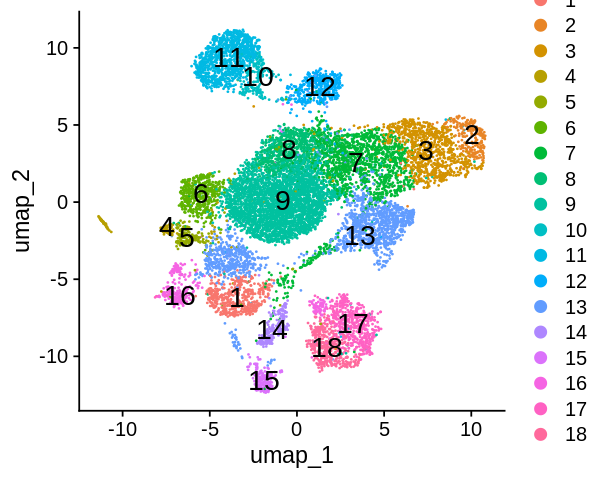

In [8]:
options(repr.plot.width=5,repr.plot.height=4)
DimPlot(append.mye,reduction = "umap",label = T,label.size = 6,group.by = "new_louvain")

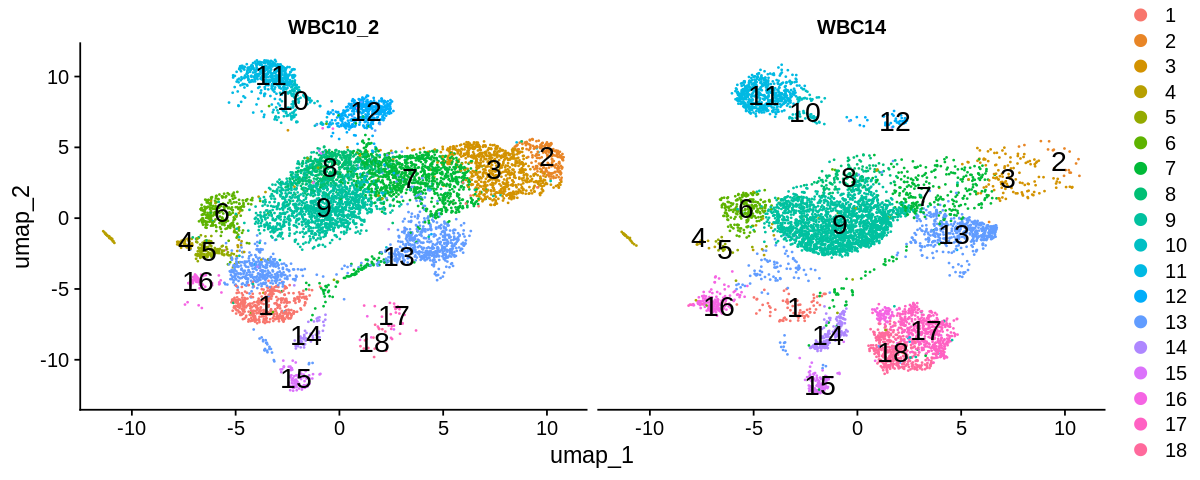

In [9]:
options(repr.plot.width=10,repr.plot.height=4)
DimPlot(append.mye,reduction = "umap",label = T,label.size = 6,group.by = "new_louvain",split.by = "batch")

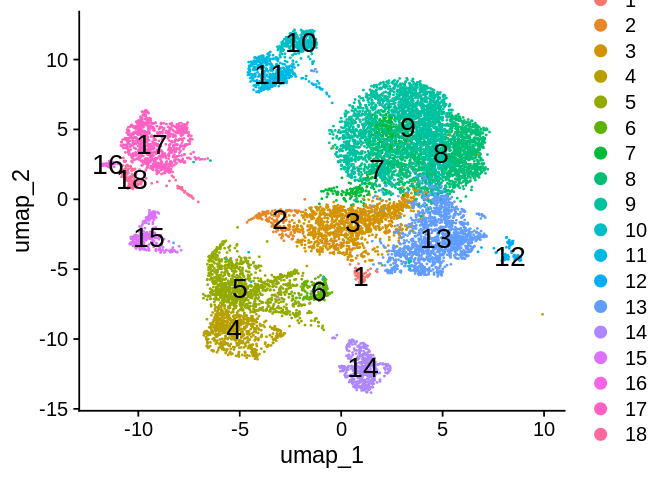

In [10]:
load("scRNAseq_WBC_revision/corelation/mye.seurat.object.Rdata")
mye=seurat
rm(seurat)

options(repr.plot.width=5.5,repr.plot.height=4)
DimPlot(mye,reduction = "umap",label = T,label.size = 6,group.by = "new_louvain")

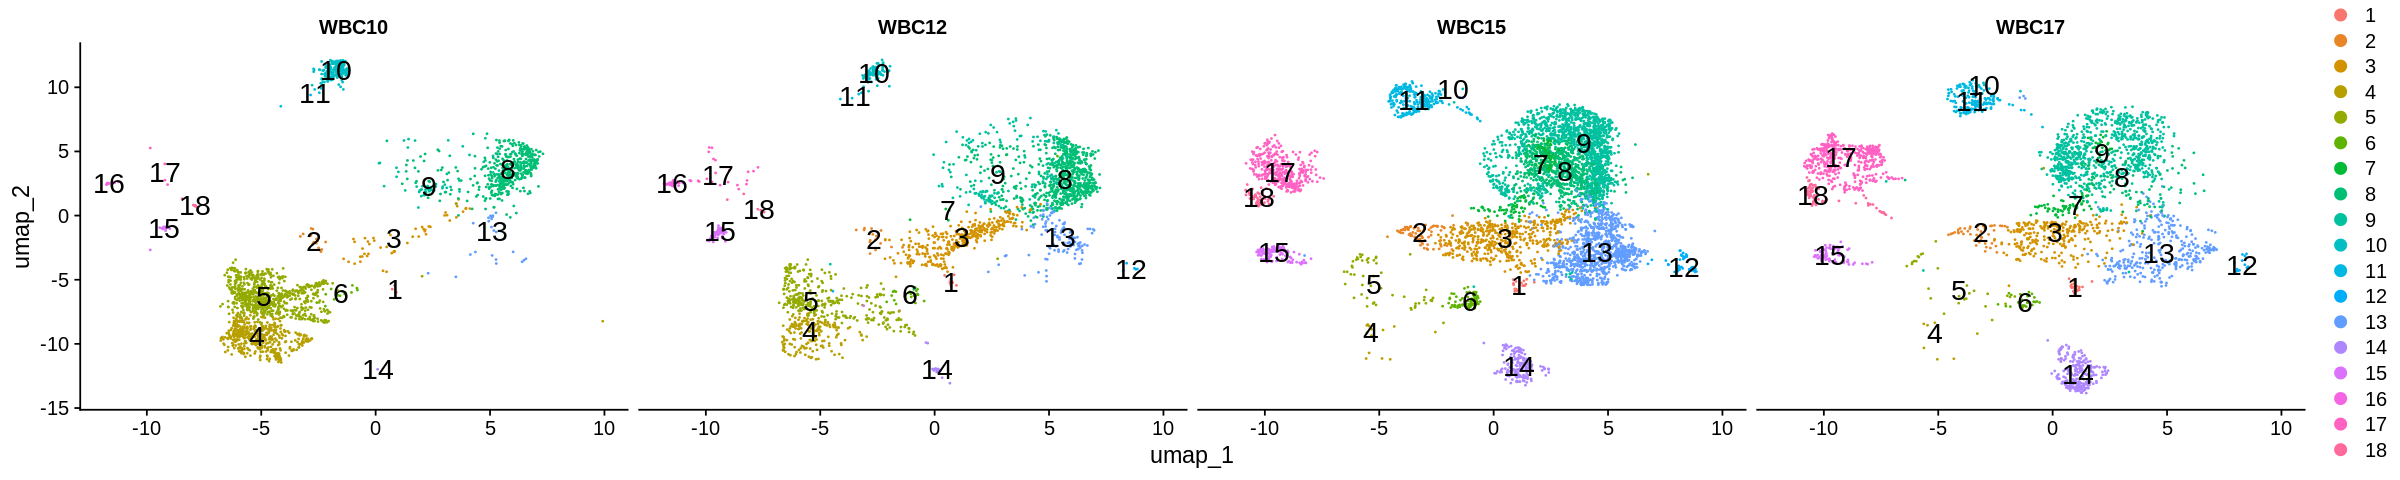

In [11]:
options(repr.plot.width=20,repr.plot.height=4)
DimPlot(mye,reduction = "umap",label = T,label.size = 6,group.by = "new_louvain",split.by = "batch")

In [12]:
mye.list=SplitObject(mye,split.by = "batch")
names(mye.list)

[1] "WBC10" "WBC12" "WBC15" "WBC17"

In [14]:
append.mye.list=SplitObject(append.mye,split.by = "batch")
names(append.mye.list)

[1] "WBC10_2" "WBC14"

In [20]:
append.mye <- FindVariableFeatures(append.mye, selection.method = "vst", nfeatures = 2000)
append.mye <- ScaleData(append.mye, verbose = FALSE)
append.mye <- RunPCA(append.mye, npcs = 30, verbose = FALSE)
append.mye <- RunUMAP(append.mye, reduction = "pca", dims = 1:30)
append.mye <- FindNeighbors(append.mye, dims = 1:30)
append.mye <- FindClusters(append.mye, resolution = 0.5)

18:55:24 UMAP embedding parameters a = 0.9922 b = 1.112
18:55:24 Read 12930 rows and found 30 numeric columns
18:55:24 Using Annoy for neighbor search, n_neighbors = 30
18:55:24 Building Annoy index with metric = cosine, n_trees = 50
0%   10   20   30   40   50   60   70   80   90   100%
[----|----|----|----|----|----|----|----|----|----|
**************************************************|
18:55:27 Writing NN index file to temp file /tmp/Rtmp5OzITs/file6a10443431bd
18:55:27 Searching Annoy index using 1 thread, search_k = 3000
18:55:32 Annoy recall = 100%
18:55:32 Commencing smooth kNN distance calibration using 1 thread
18:55:33 Initializing from normalized Laplacian + noise
18:55:33 Commencing optimization for 200 epochs, with 558800 positive edges
18:55:48 Optimization finished
Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 12930
Number of edges: 480854

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.9194
Number of communities: 23
Elapsed time: 1 seconds


In [21]:
for(i in 1:length(mye.list)){
  mye.list[[i]]=FindVariableFeatures(mye.list[[i]], selection.method = "vst", nfeatures = 2000)
}

In [22]:
mye.anchors <- FindIntegrationAnchors(object.list = mye.list, dims = 1:30)
mye.integrated <- IntegrateData(anchorset = mye.anchors, dims = 1:30)

Computing 2000 integration features
Scaling features for provided objects
Finding all pairwise anchors
Running CCA
Merging objects
Finding neighborhoods
Finding anchors
	Found 5072 anchors
Filtering anchors
	Retained 2672 anchors
Extracting within-dataset neighbors
Running CCA
Merging objects
Finding neighborhoods
Finding anchors
	Found 6426 anchors
Filtering anchors
	Retained 2268 anchors
Extracting within-dataset neighbors
Running CCA
Merging objects
Finding neighborhoods
Finding anchors
	Found 7129 anchors
Filtering anchors
	Retained 3456 anchors
Extracting within-dataset neighbors
Running CCA
Merging objects
Finding neighborhoods
Finding anchors
	Found 5491 anchors
Filtering anchors
	Retained 2369 anchors
Extracting within-dataset neighbors
Running CCA
Merging objects
Finding neighborhoods
Finding anchors
	Found 5760 anchors
Filtering anchors
	Retained 3509 anchors
Extracting within-dataset neighbors
Running CCA
Merging objects
Finding neighborhoods
Finding anchors
	Found 8405 anch

In [23]:
DefaultAssay(mye.integrated)="integrated"

In [24]:
mye.integrated <- ScaleData(mye.integrated, verbose = FALSE)
mye.integrated <- RunPCA(mye.integrated, npcs = 30, verbose = FALSE)
mye.integrated <- RunUMAP(mye.integrated, reduction = "pca", dims = 1:30)
mye.integrated <- FindNeighbors(mye.integrated, dims = 1:30)
mye.integrated <- FindClusters(mye.integrated, resolution = 0.5)

18:58:37 UMAP embedding parameters a = 0.9922 b = 1.112
18:58:37 Read 11778 rows and found 30 numeric columns
18:58:37 Using Annoy for neighbor search, n_neighbors = 30
18:58:37 Building Annoy index with metric = cosine, n_trees = 50
0%   10   20   30   40   50   60   70   80   90   100%
[----|----|----|----|----|----|----|----|----|----|
**************************************************|
18:58:39 Writing NN index file to temp file /tmp/Rtmp5OzITs/file6a104591a872
18:58:39 Searching Annoy index using 1 thread, search_k = 3000
18:58:44 Annoy recall = 100%
18:58:44 Commencing smooth kNN distance calibration using 1 thread
18:58:45 Initializing from normalized Laplacian + noise
18:58:46 Commencing optimization for 200 epochs, with 531272 positive edges
18:58:59 Optimization finished
Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 11778
Number of edges: 542770

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8993
Number of communities: 16
Elapsed time: 1 seconds


In [25]:
transfer.anchors <- FindTransferAnchors(reference = mye.integrated, query = append.mye,dims = 1:30)

Performing PCA on the provided reference using 2000 features as input.
Projecting PCA
Finding neighborhoods
Finding anchors
	Found 7044 anchors
Filtering anchors
	Retained 3895 anchors
Extracting within-dataset neighbors


In [26]:
predictions <- TransferData(anchorset = transfer.anchors, refdata = mye.integrated$new_louvain,dims = 1:30)

Finding integration vectors
Finding integration vector weights
Predicting cell labels


In [28]:
append.mye$cellAnno=predictions$predicted.id

In [29]:
mye$cellAnno=mye$new_louvain

In [30]:
mye.list=SplitObject(mye,split.by = "batch")
names(mye.list)

[1] "WBC10" "WBC12" "WBC15" "WBC17"

In [31]:
append.mye.list=SplitObject(append.mye,split.by = "batch")
names(append.mye.list)

[1] "WBC10_2" "WBC14"

In [34]:
total.mye.list=list(mye.list[[1]],mye.list[[2]],mye.list[[3]],mye.list[[4]],append.mye.list[[1]],append.mye.list[[2]])
total.mye.list

[[1]]
An object of class Seurat 
20135 features across 2050 samples within 1 assay 
Active assay: RNA (20135 features)
 1 dimensional reduction calculated: umap

[[2]]
An object of class Seurat 
20135 features across 2152 samples within 1 assay 
Active assay: RNA (20135 features)
 1 dimensional reduction calculated: umap

[[3]]
An object of class Seurat 
20135 features across 4855 samples within 1 assay 
Active assay: RNA (20135 features)
 1 dimensional reduction calculated: umap

[[4]]
An object of class Seurat 
20135 features across 2721 samples within 1 assay 
Active assay: RNA (20135 features)
 1 dimensional reduction calculated: umap

[[5]]
An object of class Seurat 
24241 features across 7248 samples within 1 assay 
Active assay: RNA (24241 features)
 2 dimensional reductions calculated: umap, pca

[[6]]
An object of class Seurat 
24241 features across 5682 samples within 1 assay 
Active assay: RNA (24241 features)
 2 dimensional reductions calculated: umap, pca


In [35]:
for(i in 1:length(total.mye.list)){
  total.mye.list[[i]]=FindVariableFeatures(total.mye.list[[i]], selection.method = "vst", nfeatures = 2000)
}

In [36]:
total.mye.anchors <- FindIntegrationAnchors(object.list = total.mye.list, dims = 1:30)
total.mye.integrated <- IntegrateData(anchorset = total.mye.anchors, dims = 1:30)

Computing 2000 integration features
Scaling features for provided objects
Finding all pairwise anchors
Running CCA
Merging objects
Finding neighborhoods
Finding anchors
	Found 5046 anchors
Filtering anchors
	Retained 2696 anchors
Extracting within-dataset neighbors
Running CCA
Merging objects
Finding neighborhoods
Finding anchors
	Found 6406 anchors
Filtering anchors
	Retained 2254 anchors
Extracting within-dataset neighbors
Running CCA
Merging objects
Finding neighborhoods
Finding anchors
	Found 7161 anchors
Filtering anchors
	Retained 3695 anchors
Extracting within-dataset neighbors
Running CCA
Merging objects
Finding neighborhoods
Finding anchors
	Found 5556 anchors
Filtering anchors
	Retained 2352 anchors
Extracting within-dataset neighbors
Running CCA
Merging objects
Finding neighborhoods
Finding anchors
	Found 5788 anchors
Filtering anchors
	Retained 3531 anchors
Extracting within-dataset neighbors
Running CCA
Merging objects
Finding neighborhoods
Finding anchors
	Found 8398 anch

In [38]:
DefaultAssay(total.mye.integrated) <- "integrated"

In [39]:
total.mye.integrated <- ScaleData(total.mye.integrated, verbose = FALSE)
total.mye.integrated <- RunPCA(total.mye.integrated, npcs = 30, verbose = FALSE)
total.mye.integrated <- RunUMAP(total.mye.integrated, reduction = "pca", dims = 1:30)
total.mye.integrated <- FindNeighbors(total.mye.integrated, dims = 1:30)
total.mye.integrated <- FindClusters(total.mye.integrated, resolution = 0.5)

19:18:53 UMAP embedding parameters a = 0.9922 b = 1.112
19:18:53 Read 24708 rows and found 30 numeric columns
19:18:53 Using Annoy for neighbor search, n_neighbors = 30
19:18:53 Building Annoy index with metric = cosine, n_trees = 50
0%   10   20   30   40   50   60   70   80   90   100%
[----|----|----|----|----|----|----|----|----|----|
**************************************************|
19:18:57 Writing NN index file to temp file /tmp/Rtmp5OzITs/file6a1044ecdc18e
19:18:57 Searching Annoy index using 1 thread, search_k = 3000
19:19:08 Annoy recall = 100%
19:19:09 Commencing smooth kNN distance calibration using 1 thread
19:19:10 Initializing from normalized Laplacian + noise
19:19:11 Commencing optimization for 200 epochs, with 1141498 positive edges
19:19:41 Optimization finished
Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 24708
Number of edges: 1156480

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.9130
Number of communities: 21
Elapsed time: 5 seconds


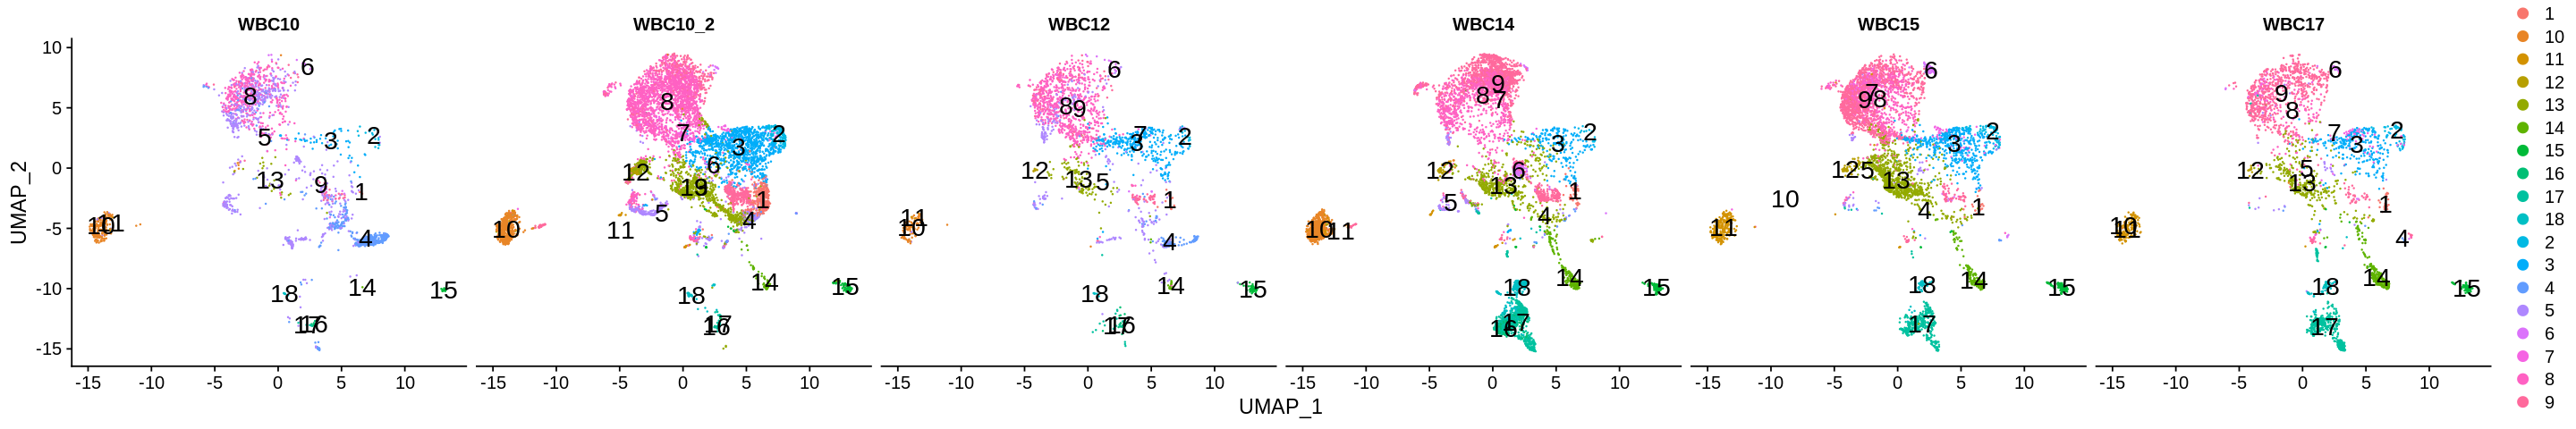

In [41]:
options(repr.plot.width=24,repr.plot.height=4)
DimPlot(total.mye.integrated,reduction = "umap",label = T,label.size = 6,split.by = "batch",group.by = "cellAnno")

In [42]:
table(total.mye.integrated$batch)


  WBC10 WBC10_2   WBC12   WBC14   WBC15   WBC17 
   2050    7248    2152    5682    4855    2721 

In [43]:
Idents(total.mye.integrated)=total.mye.integrated$batch
new.batch=c("10w","12w","12w","14w","15_17w","15_17w")
names(new.batch)=c("WBC10","WBC10_2","WBC12","WBC14","WBC15","WBC17")
total.mye.integrated=RenameIdents(total.mye.integrated,new.batch)

In [44]:
total.mye.integrated$new.batch=Idents(total.mye.integrated)

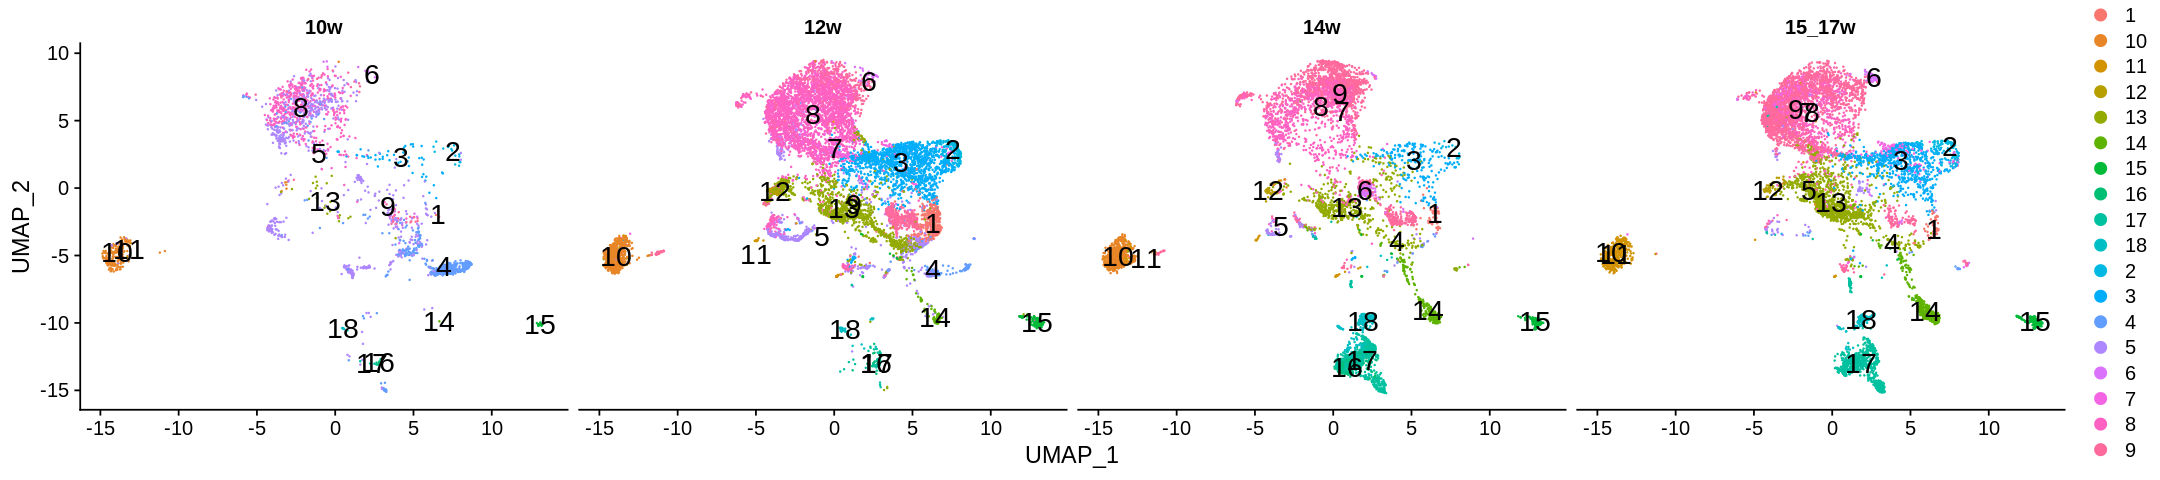

In [45]:
options(repr.plot.width=18,repr.plot.height=4)
DimPlot(total.mye.integrated,reduction = "umap",label = T,label.size = 6,split.by = "new.batch",group.by = "cellAnno")

In [46]:
library(reshape2)
num.stat.melt=as.data.frame(table(total.mye.integrated$cellAnno,total.mye.integrated$new.batch))
head(num.stat.melt)

Var1,Var2,Freq
1,10w,3
10,10w,191
11,10w,4
12,10w,0
13,10w,23
14,10w,1


In [47]:
num.stat=dcast(num.stat.melt,formula =Var1 ~ Var2,value.var = "Freq" )

In [48]:
num.stat

Var1,10w,12w,14w,15_17w
1,3,336,44,46
10,191,605,546,6
11,4,51,54,393
12,0,75,28,64
13,23,1258,541,1262
14,1,69,189,410
15,11,151,121,186
16,8,28,129,0
17,4,56,719,771
18,7,31,243,122


In [49]:
rownames(num.stat)=num.stat$Var1
num.stat$Var1=NULL

In [50]:
num.stat.ratio=apply(num.stat,2,function(x){x/sum(x)})

In [51]:
num.stat.ratio

,10w,12w,14w,15_17w
1,0.0014634146,0.035744681,0.007743752,0.0060718057
10,0.0931707317,0.064361702,0.096092925,0.0007919747
11,0.0019512195,0.005425532,0.009503696,0.0518743400
12,0.0000000000,0.007978723,0.004927842,0.0084477297
13,0.0112195122,0.133829787,0.095212953,0.1665786695
14,0.0004878049,0.007340426,0.033262936,0.0541182682
15,0.0053658537,0.016063830,0.021295319,0.0245512144
16,0.0039024390,0.002978723,0.022703273,0.0000000000
17,0.0019512195,0.005957447,0.126539951,0.1017687434
18,0.0034146341,0.003297872,0.042766631,0.0161034847


In [53]:
plotData1=num.stat.ratio[c("4","5","8","10"),]
plotData1

,10w,12w,14w,15_17w
4,0.23707317,0.02361702,0.003695882,0.0026399155
5,0.34780488,0.08287234,0.020767335,0.0109556494
8,0.22341463,0.31542553,0.187082013,0.1052006336
10,0.09317073,0.06436170,0.096092925,0.0007919747


In [54]:
plotData1.melt=melt(plotData1)
plotData1.melt

Var1,Var2,value
4,10w,0.2370731707
5,10w,0.3478048780
8,10w,0.2234146341
10,10w,0.0931707317
4,12w,0.0236170213
5,12w,0.0828723404
8,12w,0.3154255319
10,12w,0.0643617021
4,14w,0.0036958817
5,14w,0.0207673354


In [55]:
library(ggplot2)

In [58]:
plotData1.melt$Var1=as.factor(plotData1.melt$Var1)

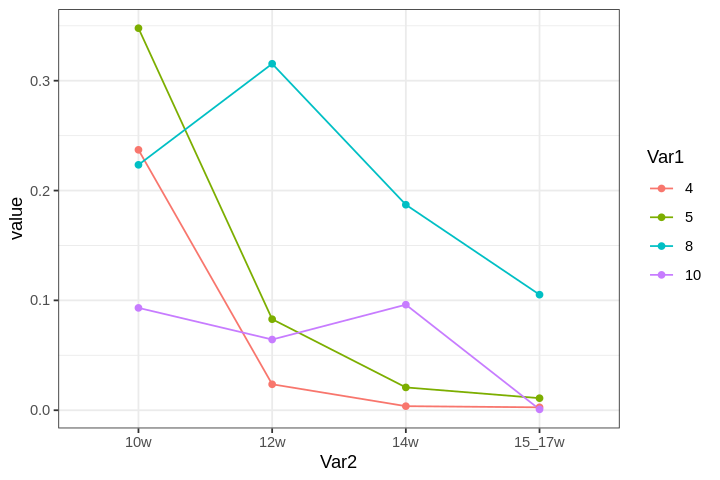

In [61]:
options(repr.plot.width=6,repr.plot.height=4)
ggplot(plotData1.melt,aes(x=Var2,y=value,color=Var1,group=Var1))+geom_line()+geom_point()+theme_bw()

In [62]:
p=ggplot(plotData1.melt,aes(x=Var2,y=value,color=Var1,group=Var1))+geom_line()+geom_point()+theme_bw()
pdf("total.mye.integrated.ratio.Fig2Bleft",width = 6,height = 4)
print(p)
dev.off()

png 
  2

In [63]:
plotData2=num.stat.ratio[c("7","12"),]
plotData2

,10w,12w,14w,15_17w
7,0,0.017340426,0.001583949,0.03761880
12,0,0.007978723,0.004927842,0.00844773


In [64]:
plotData2.melt=melt(plotData2)
plotData2.melt

Var1,Var2,value
7,10w,0.000000000
12,10w,0.000000000
7,12w,0.017340426
12,12w,0.007978723
7,14w,0.001583949
12,14w,0.004927842
7,15_17w,0.037618796
12,15_17w,0.008447730


In [65]:
plotData2.melt$Var1=as.factor(plotData2.melt$Var1)

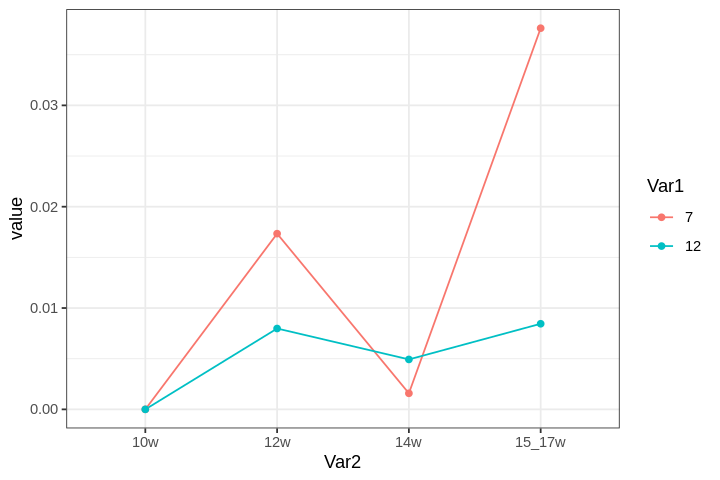

In [66]:
options(repr.plot.width=6,repr.plot.height=4)
ggplot(plotData2.melt,aes(x=Var2,y=value,color=Var1,group=Var1))+geom_line()+geom_point()+theme_bw()

In [67]:
p=ggplot(plotData2.melt,aes(x=Var2,y=value,color=Var1,group=Var1))+geom_line()+geom_point()+theme_bw()
pdf("total.mye.integrated.ratio.Fig2Bright",width = 6,height = 4)
print(p)
dev.off()

png 
  2

In [68]:
load("scRNAseq_WBC_revision/corelation/All.seurat.object.Rdata")

In [87]:
selCols=(c("#DCB717","#E2272E","#5EA5C9","#76AB62","#91217F","#fdb462","#EA9014","#5A7FB9","#757C98","#178F3B","#F1A1BF","#33B9C1","#B39BC2","#851B3B","#fb8072","#80b1d3","#b3de69","#fccde5","#bc80bd","#9ebcda"))
usedCol=sample(selCols,size = 18,replace = F)

In [93]:
usedCol[3]="#FF1493"
usedCol[16]="#00FF00"
usedCol[8]="#FF4500"

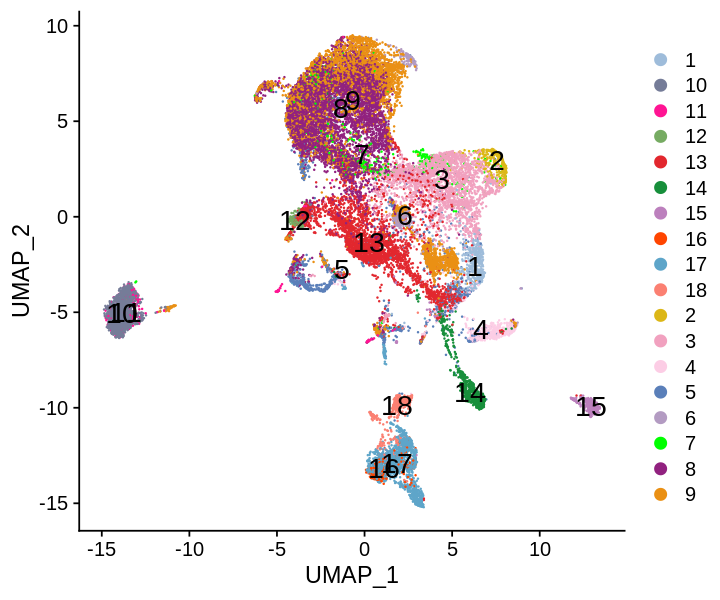

In [94]:
options(repr.plot.width=6,repr.plot.height=5)
DimPlot(total.mye.integrated,reduction = "umap",label = T,label.size = 6,group.by = "cellAnno",cols = usedCol)

In [95]:
save(total.mye.integrated,file="total.mye.integrated.seurat.object.Rdata")

In [96]:
save(usedCol,file="total.mye.integrated.usedCol.Rdata")

In [ ]:
selCols=(c("#DCB717","#E2272E","#5EA5C9","#76AB62","#91217F","#fdb462","#EA9014","#5A7FB9","#757C98","#178F3B","#F1A1BF","#33B9C1","#B39BC2","#851B3B","#fb8072","#80b1d3","#b3de69","#fccde5","#bc80bd","#9ebcda"))
options(repr.plot.width=6,repr.plot.height=5)
DimPlot(total.mye.integrated,reduction = "umap",label = T,label.size = 6,group.by = "cellAnno",cols = selCols)